In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris


In [35]:
base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'
df_diabtes = pd.read_csv(base_path+'/Diabetes.csv')


In [36]:
df_iris = pd.read_csv(base_path+'/IRIS.csv')


In [37]:
df_iris.head(150)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
df_loan_application = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')


In [39]:
df_Customer_churn = pd.read_csv(base_path+'/TelecomCustomerChurn.csv')


In [40]:

bank_marketing = fetch_ucirepo(id=222) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
df_Marketing = pd.concat([X, y], axis=1)


In [41]:
df_HR = pd.read_csv(base_path+'/HR50k.csv')


In [42]:
df_Cancer = pd.read_csv(base_path+'/Cancer.csv')


In [43]:
df_OnlineRetail = pd.read_excel(base_path+'/Online Retail.xlsx')


In [44]:
# df_CreditCard = pd.read_csv(base_path+'/CreditCard.csv')
df_Student = pd.read_csv(base_path+'/Students Performance.csv')


In [45]:
df_election = pd.read_csv(base_path+'/presidential_polls.csv')


In [46]:
df_Bank = df_Marketing


In [47]:
df_Youtube = pd.read_csv(base_path+'/YouTube Spam.csv')


In [48]:
def eda(df,target): #Exploratory Data Analysis 
    print(df.shape)
    for col in df.select_dtypes(include=['object']).columns:
        
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        
    print(df.head())
    print(df.cov())
    
    # sns.pairplot(df)
    # x = df.iloc[:, :q]
    # y = df.iloc[:, q]
    x=df.drop(columns=[target])
    y=df[target]

    print(x.head())
    print(y.head())
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    print(x_train)
    print(x_test)
    return x_train, x_test, y_train, y_test  


In [49]:
k_range = list(range(1,120))
param_grid = dict(n_neighbors = k_range)


In [50]:
def knn_classifier(x_train, x_test, y_train, y_test,parameters):
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(x_train, y_train)
    print(grid.best_params_)
    print(grid.best_estimator_)
    y_pred = grid.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    return grid.best_params_, grid.best_estimator_, y_pred, cm


In [51]:
x_train, x_test, y_train, y_test = eda(df=df_diabtes,target='diabetes')


(768, 9)
   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
             pregnancies      glucose   diastolic     triceps       insulin  \
pregnancies    11.354056    13.947131    9.214538   -4.390041    -28.555231   
glucose        13.947131  1022.248314   94.430956   29.239183   1220.935799   
diastolic       9.214538    94.430956  374.647271   64.029396    198.378412   
triceps        -4.390041    29.239183   64.029396  254.473245    802.979941   
insulin       -28.555231  1220.935799  198.378412  802.979941  1328

{'n_neighbors': 21}
KNeighborsClassifier(n_neighbors=21)
0.7987012987012987
[[97 10]
 [21 26]]


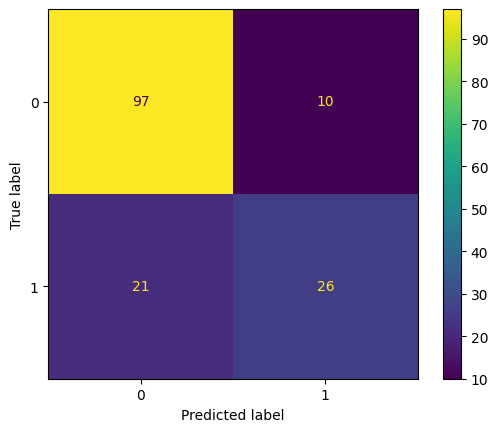

({'n_neighbors': 21},
 KNeighborsClassifier(n_neighbors=21),
 array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([[97, 10],
        [21, 26]]))

In [52]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [53]:
x_train, x_test, y_train, y_test = eda(df=df_iris,target='species')


(150, 5)
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      0.685694    -0.039268      1.273682     0.516904  0.530872
sepal_width      -0.039268     0.188004     -0.321713    -0.117981 -0.148993
petal_length      1.273682    -0.321713      3.113179     1.296387  1.371812
petal_width       0.516904    -0.117981      1.296387     0.582414  0.597987
species           0.530872    -0.148993      1.371812     0.597987  0.671141
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.

/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packag

{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packag

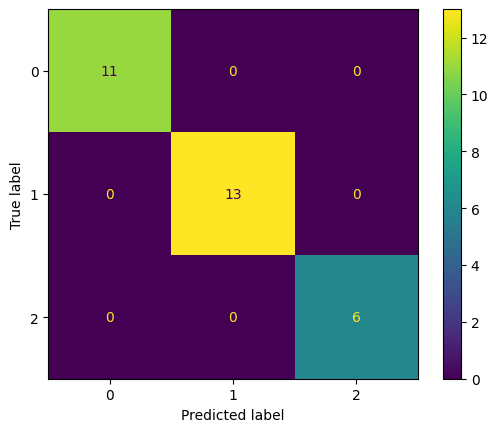

({'n_neighbors': 7},
 KNeighborsClassifier(n_neighbors=7),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0]),
 array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]]))

In [54]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [55]:
from sklearn.datasets import load_digits
digits = load_digits()
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['Target'] = digits.target  # add target column to the dataframe
df_digits.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [56]:
x_train, x_test, y_train, y_test = eda(df=df_digits,target='Target')


(1797, 65)
   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0

{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
0.9694444444444444
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  0  2  0  0  0  0 35  0]
 [ 0  0  0  0  0  1  0  1  0 39]]


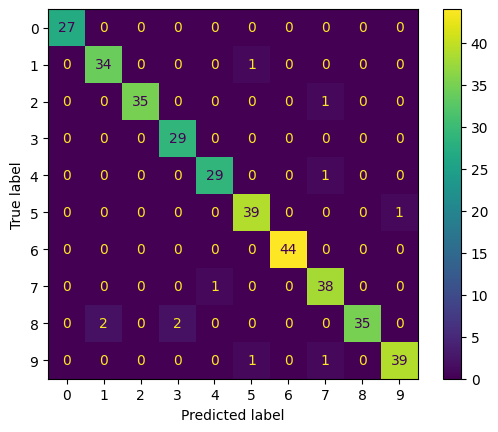

({'n_neighbors': 7},
 KNeighborsClassifier(n_neighbors=7),
 array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
        8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
        1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
        7, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
        1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
        3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 3, 4, 1, 7, 0, 6, 1, 5, 9, 9,
        9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
        6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 1, 9, 3, 6, 1, 0, 4, 1, 6,
        3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 4, 7, 5, 7, 8, 0, 7, 8, 9,
        6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
        2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
        9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
        9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 

In [57]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [58]:
from sklearn.datasets import load_wine
wine=load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['Target'] = wine.target  # add target column to the dataframe
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [59]:
x_train, x_test, y_train, y_test = eda(df=df_wine,target='Target')


(178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0

{'n_neighbors': 28}
KNeighborsClassifier(n_neighbors=28)
1.0
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


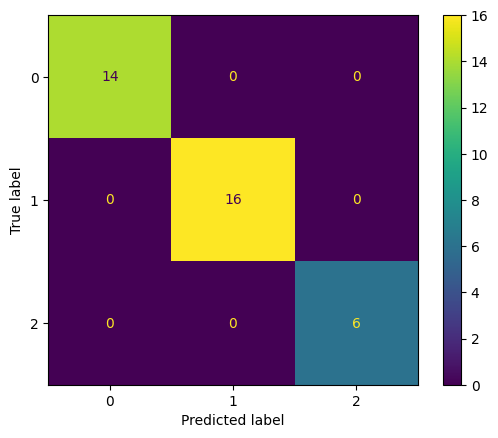

({'n_neighbors': 28},
 KNeighborsClassifier(n_neighbors=28),
 array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0]),
 array([[14,  0,  0],
        [ 0, 16,  0],
        [ 0,  0,  6]]))

In [60]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [61]:
df_Housing = pd.read_csv(base_path+'/House Prices.csv')
df_Housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [62]:
x_train, x_test, y_train, y_test = eda(df=df_Housing,target='zipcode')


(21613, 21)
   ID  Date     Price  Bedrooms  Bathrooms  Sqft_living  Sqft_lot  Floors  \
0   1   137  280000.0         6       3.00         2400      9373     2.0   
1   2   346  300000.0         6       3.00         2400      9373     2.0   
2   3     6  647500.0         4       1.75         2060     26036     1.0   
3   4   101  400000.0         3       1.00         1460     43000     1.0   
4   5   325  235000.0         3       1.00         1430      7599     1.5   

   Waterfront  View  ...  Grade  Sqft_above  Sqft_basement  Yr_built  \
0           0     0  ...      7        2400              0      1991   
1           0     0  ...      7        2400              0      1991   
2           0     0  ...      8        1160            900      1947   
3           0     0  ...      7        1460              0      1952   
4           0     0  ...      6        1010            420      1930   

   Yr_renovated  zipcode      Lat     Long  Sqft_living15  Sqft_lot15  
0             0    9

In [63]:
df_Housing.shape


(21613, 21)

In [64]:
# knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [65]:
df_OnlineRetail.head(   )


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [66]:
df_OnlineRetail.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [67]:
df_OnlineRetail.drop(['CustomerID','InvoiceNo','InvoiceDate'], axis=1, inplace=True)  


In [68]:
df_OnlineRetail.dropna(inplace=True)


In [69]:
df_OnlineRetail.info()


<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    540455 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     540455 non-null  int64  
 3   UnitPrice    540455 non-null  float64
 4   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.7+ MB


In [70]:
# x_train, x_test, y_train, y_test = eda(df=df_OnlineRetail,target='UnitPrice')


In [71]:
df_weather = pd.read_csv(base_path+'/weatherHistory.csv')


In [72]:
df_weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [73]:
df_weather.shape


(96453, 12)

In [74]:

x_train, x_test, y_train, y_test = eda(df=df_weather,target='Daily Summary')


(96453, 12)
   Formatted Date  Summary  Precip Type  Temperature (C)  \
0            2159       19            0         9.472222   
1            2160       19            0         9.355556   
2            2161       17            0         9.377778   
3            2162       19            0         8.288889   
4            2163       17            0         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0 

In [75]:
k_ = list(range(1,2))
param_ = dict(n_neighbors = k_)
# knn_classifier(x_train, x_test, y_train, y_test,parameters=param_)


In [76]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
zoo = fetch_ucirepo(id=111) 
  
# data (as pandas dataframes) 
X = zoo.data.features 
y = zoo.data.targets 
df_zoo = pd.concat([X, y], axis=1)
df_zoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [77]:
df_zoo.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [78]:
x_train, x_test, y_train, y_test = eda(df=df_zoo,target='type')


(101, 17)
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     0         0        1     1  
1         1         0     0     4     1         0        1     1  
2         0         0     1     0     1         0        0     4  
3         1         0     0     4     0         0        1     1  
4         1         0     0     4     1         0        1     1  
              hair  feathers      eggs      milk  airborne   aquatic  \
hair      0.246931 -0.085149 

/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mr-a

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
0.9523809523809523
[[7 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


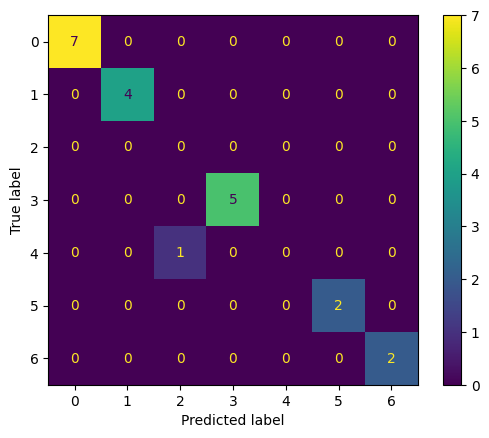

({'n_neighbors': 1},
 KNeighborsClassifier(n_neighbors=1),
 array([3, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2]),
 array([[7, 0, 0, 0, 0, 0, 0],
        [0, 4, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 5, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 2]]))

In [79]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [ ]:
df_heart = pd.read_csv(base_path+'/heart.csv')


In [83]:
df_heart.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [82]:
x_train, x_test, y_train, y_test = eda(df=df_heart,target='thal')


(1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
                 age       sex        cp    trestbps         chol       fbs  \
age        82.306450 -0.431198 -0.672251   43.085733   102.890625  0.392164   
sex        -0.431198  0.211944 -0.019491   -0.636863    -4.708984  0.004465   
cp         -0.672251 -0.019491  1.060160    0.688565    -4.336914  0.029108   
trestbps   43.085733 -0.636863  0.688565  306.835410  

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
1.0
[[ 98   0]
 [  0 107]]


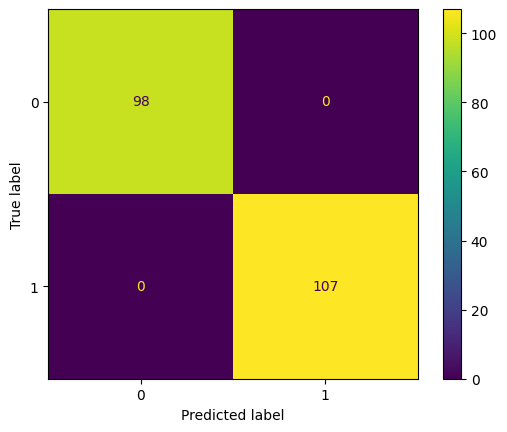

({'n_neighbors': 1},
 KNeighborsClassifier(n_neighbors=1),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 1]),
 array([[ 98,   0],
        [  0, 107]]))

In [84]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)


In [87]:
df_movies = pd.read_csv(base_path+'/Movies Recommendation.csv')


In [89]:
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [91]:
x_train, x_test, y_train, y_test = eda(df=df_movies,target='Movie_Genre')


(4760, 21)
   Movie_ID  Movie_Title  Movie_Genre  Movie_Language  Movie_Budget  \
0         1         1325          551               7       4000000   
1         2         3194          240               7      11000000   
2         3         1264          394               7      94000000   
3         4         1317          470               7      55000000   
4         5          239          605               7      15000000   

   Movie_Popularity  Movie_Release_Date  Movie_Revenue  Movie_Runtime  \
0         22.876230                 944        4300000           98.0   
1        126.393695                2675      775398007          121.0   
2         85.688789                3148      940335536          100.0   
3        138.133331                 572      677945399          142.0   
4         80.878605                1611      356296601          122.0   

   Movie_Vote  ...  Movie_Homepage  Movie_Keywords  Movie_Overview  \
0         6.5  ...            1678            1826   

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
1.0
[[ 98   0]
 [  0 107]]


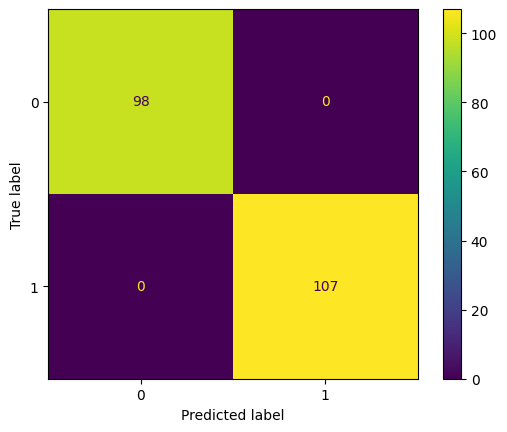

({'n_neighbors': 1},
 KNeighborsClassifier(n_neighbors=1),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 0, 1]),
 array([[ 98,   0],
        [  0, 107]]))

In [90]:
knn_classifier(x_train, x_test, y_train, y_test,parameters=param_grid)
